# Personalized Recommendation On Resume Using Generative AI
## 1. Profile Classification

- **Mapping CVs**: The first step is to map CVs to the intended profiles.
  
- **Generating Recommendations**: Recommendations are provided to candidates about their own skills, potentially mapping to other profiles as well.


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import os
import nltk
from wordcloud import WordCloud

In [ ]:
!pip install pypdf --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
from pypdf import PdfReader

# Let's play with the data

In [ ]:
dataset = 'https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset'

In [ ]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: megabeing
Your Kaggle Key: ··········


100%|██████████| 62.5M/62.5M [00:01<00:00, 64.7MB/s]


List the Classes

In [ ]:
root_directory = '/content/resume-dataset/data/data'
directories_list = [d for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))]

# Print the list of directories
print("List of directories in the root directory:")
for directory in directories_list:
    print(directory)


List of directories in the root directory:
HR
APPAREL
SALES
PUBLIC-RELATIONS
FINANCE
AGRICULTURE
ARTS
CHEF
ACCOUNTANT
INFORMATION-TECHNOLOGY
TEACHER
ENGINEERING
HEALTHCARE
CONSTRUCTION
DIGITAL-MEDIA
CONSULTANT
AUTOMOBILE
FITNESS
ADVOCATE
AVIATION
BUSINESS-DEVELOPMENT
BANKING
DESIGNER
BPO


Creation of Train, Val, Test

In [ ]:
data = pd.read_csv('/content/resume-dataset/Resume/Resume.csv')
data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
data.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [ ]:
data.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


We just Text inside Resume to just classify them into categories

In [ ]:
resume_per_category = data.groupby(['Category']).count()
resume_per_category

,ID,Resume_str,Resume_html
Category,,,
ACCOUNTANT,118,118,118
ADVOCATE,118,118,118
AGRICULTURE,63,63,63
APPAREL,97,97,97
ARTS,103,103,103
AUTOMOBILE,36,36,36
AVIATION,117,117,117
BANKING,115,115,115
BPO,22,22,22


Resume Per Category

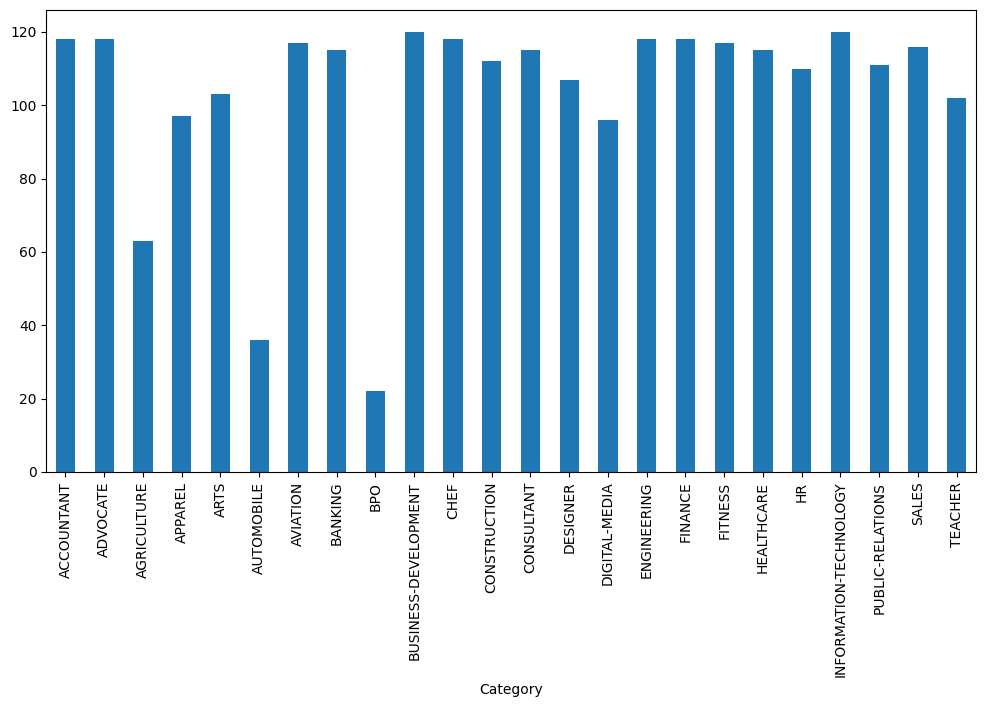

In [ ]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

# Text Preprocessing

### Testing with one sample

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reader = PdfReader('/content/resume-dataset/data/data/HR/16852973.pdf')

In [ ]:
len(reader.pages)

2

In [ ]:
page = reader.pages[0]

In [ ]:
test = page.extract_text()

In [ ]:
print(test)

HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINISTRATOR
Summary
Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.
Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.
Highlights
Focused on customer satisfaction
Team management
Marketing savvy
Conflict resolution techniques
Training and development
Skilled multi-tasker
Client relations specialist
Accomplishments
Missouri DOT Supervisor Training Certification
Certified by IHG in Customer Loyalty and Marketing by Segment
Hilton Worldwide General Manager Training Certification
Accomplished Trainer for cross server hospitality systems such as 
Hilton OnQ
 
, 
Micros 
Opera PMS
 
, Fidelio 
OPERA
 
Reservation
System (ORS)
 , 
Holidex
Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management,
leadership and performance assessment.
Exper

In [ ]:
type(test)

str

In [ ]:
import re

In [ ]:
def clean_data(dta):
  dta = dta.lower()
  dta = re.sub('\n',' <eol> ',dta)
  dta = re.sub('//','',dta)
  pattern = re.compile(r"[!\"#\$%&\'\(\)\*\+,-\./:;=\?@\[\\\]\^_`{\|}~－]")
  dta = re.sub(pattern,'',dta)
  dta = re.sub('\s+',' ',dta).strip()
  dta = re.split('\s',dta)
  dta = [w for w in dta if not w in stop_words and w != '']
  return dta

In [ ]:
test = clean_data(test)

In [ ]:
print(test)

['hr', 'administratormarketing', 'associate', 'hr', 'administrator', '<eol>', 'summary', '<eol>', 'dedicated', 'customer', 'service', 'manager', '15', 'years', 'experience', 'hospitality', 'customer', 'service', 'management', '<eol>', 'respected', 'builder', 'leader', 'customerfocused', 'teams', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', '<eol>', 'highlights', '<eol>', 'focused', 'customer', 'satisfaction', '<eol>', 'team', 'management', '<eol>', 'marketing', 'savvy', '<eol>', 'conflict', 'resolution', 'techniques', '<eol>', 'training', 'development', '<eol>', 'skilled', 'multitasker', '<eol>', 'client', 'relations', 'specialist', '<eol>', 'accomplishments', '<eol>', 'missouri', 'dot', 'supervisor', 'training', 'certification', '<eol>', 'certified', 'ihg', 'customer', 'loyalty', 'marketing', 'segment', '<eol>', 'hilton', 'worldwide', 'general', 'manager', 'training', 'certification', '<eol>', 'accomplished', 'trainer', 'cross', 'server', 'hospi

# Test 1 - Basic Regex Operations
# Now for the whole dataset

In [ ]:
cdata = data.drop(['Resume_html','ID'],axis = 1)

In [ ]:
cdata

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [ ]:
cdata['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [ ]:
for x in range(len(cdata)):
   cdata['Resume_str'][x]= clean_data(cdata['Resume_str'][x])


In [ ]:
print(cdata['Resume_str'][0])

['hr', 'administratormarketing', 'associate', '<eol>', '<eol>', 'hr', 'administrator', 'summary', 'dedicated', 'customer', 'service', 'manager', '15', 'years', 'experience', 'hospitality', 'customer', 'service', 'management', 'respected', 'builder', 'leader', 'customerfocused', 'teams', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', 'highlights', 'focused', 'customer', 'satisfaction', 'team', 'management', 'marketing', 'savvy', 'conflict', 'resolution', 'techniques', 'training', 'development', 'skilled', 'multitasker', 'client', 'relations', 'specialist', 'accomplishments', 'missouri', 'dot', 'supervisor', 'training', 'certification', 'certified', 'ihg', 'customer', 'loyalty', 'marketing', 'segment', 'hilton', 'worldwide', 'general', 'manager', 'training', 'certification', 'accomplished', 'trainer', 'cross', 'server', 'hospitality', 'systems', 'hilton', 'onq', 'micros', 'opera', 'pms', 'fidelio', 'opera', 'reservation', 'system', 'ors', 'holidex', 

In [ ]:
cdata

,Resume_str,Category
0,"[hr, administratormarketing, associate, <eol>,...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, 20, years, experience,...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR
...,...,...
2479,"[rank, sgte5, non, commissioned, officer, char...",AVIATION
2480,"[government, relations, communications, organi...",AVIATION
2481,"[geek, squad, agent, professional, profile, su...",AVIATION
2482,"[program, director, office, manager, summary, ...",AVIATION


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [ ]:
cdata.isna().sum()

Resume_str    0
Category      0
dtype: int64

### Create a Corpus

In [ ]:
corpus = set()

In [ ]:
for x in cdata['Resume_str']:
  for y in x:
    corpus.add(y)

In [ ]:
corpus

{'willis',
 'breakins',
 'lath',
 'relied',
 'dbc',
 'desktops',
 'investor',
 'peru',
 'codinginsurance',
 'vicechair',
 'membersdiverse',
 '5236000',
 'bays',
 'bpu',
 'macys',
 'aseptic',
 'hurdles',
 'fayaz',
 'julyaugustsept',
 'engineairframe',
 'fuel',
 'rodriguez',
 'overwhelmed',
 'rentalmaintenance',
 'servicepublic',
 'conveying',
 'vera',
 'profiency',
 '409',
 'salespeoples',
 'rentable',
 'instructional',
 'cuttings',
 'brainstorm',
 'immunology',
 'modality',
 'poc',
 'absorbed',
 'highrisk',
 'childhood6',
 'affected',
 'volleball',
 'marketableclear',
 '20032007',
 'usd',
 'surfaces',
 'mannequins',
 'ultrasounds',
 'p2p',
 '5week',
 'creditworthy',
 'researcher',
 'wipro',
 'ratings',
 'bledsoe',
 'prehospital',
 'operatingmanaging',
 'denial',
 'reposition',
 'trophies',
 'oakland',
 'consolidator',
 'redx',
 'attorneys',
 'xwing32',
 'ides',
 'transmitter',
 'constructware',
 'farrellaposs',
 'post911',
 'createdmaintained',
 'youthserving',
 'sama',
 'can”',
 'addh

In [ ]:
len(corpus)

54935

That's a Big Number

In [ ]:
len(cdata)

2484

Map words to a number bcz neural network only understands number

In [ ]:
corpus = list(corpus)

In [ ]:
word_to_num = {word: i+1 for i, word in enumerate(corpus)}

In [ ]:
word_to_num

{'willis': 1,
 'breakins': 2,
 'lath': 3,
 'relied': 4,
 'dbc': 5,
 'desktops': 6,
 'investor': 7,
 'peru': 8,
 'codinginsurance': 9,
 'vicechair': 10,
 'membersdiverse': 11,
 '5236000': 12,
 'bays': 13,
 'bpu': 14,
 'macys': 15,
 'aseptic': 16,
 'hurdles': 17,
 'fayaz': 18,
 'julyaugustsept': 19,
 'engineairframe': 20,
 'fuel': 21,
 'rodriguez': 22,
 'overwhelmed': 23,
 'rentalmaintenance': 24,
 'servicepublic': 25,
 'conveying': 26,
 'vera': 27,
 'profiency': 28,
 '409': 29,
 'salespeoples': 30,
 'rentable': 31,
 'instructional': 32,
 'cuttings': 33,
 'brainstorm': 34,
 'immunology': 35,
 'modality': 36,
 'poc': 37,
 'absorbed': 38,
 'highrisk': 39,
 'childhood6': 40,
 'affected': 41,
 'volleball': 42,
 'marketableclear': 43,
 '20032007': 44,
 'usd': 45,
 'surfaces': 46,
 'mannequins': 47,
 'ultrasounds': 48,
 'p2p': 49,
 '5week': 50,
 'creditworthy': 51,
 'researcher': 52,
 'wipro': 53,
 'ratings': 54,
 'bledsoe': 55,
 'prehospital': 56,
 'operatingmanaging': 57,
 'denial': 58,
 're

In [ ]:
word_to_num['<PAD>'] = 0

### Convertion of Text Data into Numerical Values

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = [word_to_num[word] for word in cdata['Resume_str'][x]]

In [ ]:
cdata['Resume_str'][0]

[12461,
 2874,
 2831,
 2492,
 2492,
 12461,
 4417,
 47341,
 35951,
 22496,
 25284,
 21104,
 4940,
 44246,
 31926,
 46987,
 22496,
 25284,
 26322,
 46258,
 48882,
 7066,
 43137,
 51997,
 40937,
 29227,
 3515,
 4044,
 4619,
 22496,
 25284,
 4848,
 35825,
 22496,
 34813,
 11071,
 26322,
 25871,
 24515,
 29241,
 46737,
 13193,
 22159,
 1658,
 27945,
 18341,
 28767,
 52251,
 36436,
 13363,
 24070,
 51979,
 20825,
 22159,
 6314,
 40239,
 54587,
 22496,
 12870,
 25871,
 51313,
 25185,
 48262,
 45625,
 21104,
 22159,
 6314,
 1428,
 14726,
 16650,
 14369,
 46987,
 1054,
 25185,
 39354,
 17625,
 25499,
 40773,
 39168,
 25499,
 8406,
 47918,
 16476,
 11058,
 8181,
 12879,
 16906,
 22496,
 25284,
 22273,
 13860,
 44834,
 34930,
 2352,
 52289,
 46558,
 13127,
 26322,
 28355,
 44686,
 28846,
 31926,
 12461,
 2874,
 2831,
 2492,
 2492,
 12461,
 4417,
 20621,
 22165,
 6745,
 51036,
 19528,
 34209,
 814,
 34186,
 10345,
 48789,
 22322,
 39546,
 52594,
 28250,
 18008,
 31267,
 52251,
 50112,
 22159,
 52

In [ ]:
type(cdata['Resume_str'][0])

list

In [ ]:
for x in range(len(cdata)):
  cdata['Resume_str'] = np.array(cdata['Resume_str'])

In [ ]:
cdata

,Resume_str,Category
0,"[12461, 2874, 2831, 2492, 2492, 12461, 4417, 4...",HR
1,"[12461, 36436, 22361, 12461, 3297, 47341, 4205...",HR
2,"[12461, 34900, 47341, 18078, 44246, 31926, 264...",HR
3,"[12461, 36436, 47341, 35951, 43483, 44426, 180...",HR
4,"[12461, 21104, 16078, 4848, 12461, 14139, 1246...",HR
...,...,...
2479,"[21138, 21885, 7958, 25399, 35724, 27979, 2736...",AVIATION
2480,"[11988, 52251, 49246, 43974, 1658, 34900, 1394...",AVIATION
2481,"[43591, 27956, 53868, 13946, 50822, 52393, 364...",AVIATION
2482,"[29445, 34900, 23367, 21104, 47341, 18401, 296...",AVIATION


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Add Padding

Example:>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example dataset sentences
sentences = [
    [1, 2, 3],
    [4, 5],
    [6, 7, 8, 9],
]

# Determine maximum length
max_length = max(len(sentence) for sentence in sentences)

# Pad sentences
padded_sentences = pad_sequences(sentences, maxlen=max_length, padding='post')

# Print padded sentences
print("Padded Sentences:")
print(padded_sentences)

# Create mask
mask = (padded_sentences != 0).astype(int)

# Print mask
print("\nMask:")
print(mask)


Padded Sentences:
[[1 2 3 0]
 [4 5 0 0]
 [6 7 8 9]]

Mask:
[[1 1 1 0]
 [1 1 0 0]
 [1 1 1 1]]


In [ ]:
max_length = max_length = max(len(x) for x in cdata['Resume_str'])
max_length

4669

In [ ]:
import tensorflow as tf

In [ ]:
padded_sentences = pad_sequences(cdata['Resume_str'], maxlen=max_length, padding='post')

In [ ]:
padded_sentences.shape

(2484, 4669)

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = padded_sentences[x]

In [ ]:
cdata

,Resume_str,Category
0,"[12461, 2874, 2831, 2492, 2492, 12461, 4417, 4...",HR
1,"[12461, 36436, 22361, 12461, 3297, 47341, 4205...",HR
2,"[12461, 34900, 47341, 18078, 44246, 31926, 264...",HR
3,"[12461, 36436, 47341, 35951, 43483, 44426, 180...",HR
4,"[12461, 21104, 16078, 4848, 12461, 14139, 1246...",HR
...,...,...
2479,"[21138, 21885, 7958, 25399, 35724, 27979, 2736...",AVIATION
2480,"[11988, 52251, 49246, 43974, 1658, 34900, 1394...",AVIATION
2481,"[43591, 27956, 53868, 13946, 50822, 52393, 364...",AVIATION
2482,"[29445, 34900, 23367, 21104, 47341, 18401, 296...",AVIATION


In [ ]:
cdata.isna().sum()

Resume_str    0
Category      0
dtype: int64

changing the target to categorical data

In [ ]:
cdata

,Resume_str,Category
0,"[12461, 2874, 2831, 2492, 2492, 12461, 4417, 4...",HR
1,"[12461, 36436, 22361, 12461, 3297, 47341, 4205...",HR
2,"[12461, 34900, 47341, 18078, 44246, 31926, 264...",HR
3,"[12461, 36436, 47341, 35951, 43483, 44426, 180...",HR
4,"[12461, 21104, 16078, 4848, 12461, 14139, 1246...",HR
...,...,...
2479,"[21138, 21885, 7958, 25399, 35724, 27979, 2736...",AVIATION
2480,"[11988, 52251, 49246, 43974, 1658, 34900, 1394...",AVIATION
2481,"[43591, 27956, 53868, 13946, 50822, 52393, 364...",AVIATION
2482,"[29445, 34900, 23367, 21104, 47341, 18401, 296...",AVIATION


In [ ]:
cate = cdata.Category.unique()

In [ ]:
cate = {x:i for i,x in enumerate(cate)}

In [ ]:
cate

{'HR': 0,
 'DESIGNER': 1,
 'INFORMATION-TECHNOLOGY': 2,
 'TEACHER': 3,
 'ADVOCATE': 4,
 'BUSINESS-DEVELOPMENT': 5,
 'HEALTHCARE': 6,
 'FITNESS': 7,
 'AGRICULTURE': 8,
 'BPO': 9,
 'SALES': 10,
 'CONSULTANT': 11,
 'DIGITAL-MEDIA': 12,
 'AUTOMOBILE': 13,
 'CHEF': 14,
 'FINANCE': 15,
 'APPAREL': 16,
 'ENGINEERING': 17,
 'ACCOUNTANT': 18,
 'CONSTRUCTION': 19,
 'PUBLIC-RELATIONS': 20,
 'BANKING': 21,
 'ARTS': 22,
 'AVIATION': 23}

In [ ]:
for x in range(len(cdata)):
  cdata.Category[x] = int(cate[cdata.Category[x]])

In [ ]:
cdata

,Resume_str,Category
0,"[12461, 2874, 2831, 2492, 2492, 12461, 4417, 4...",0
1,"[12461, 36436, 22361, 12461, 3297, 47341, 4205...",0
2,"[12461, 34900, 47341, 18078, 44246, 31926, 264...",0
3,"[12461, 36436, 47341, 35951, 43483, 44426, 180...",0
4,"[12461, 21104, 16078, 4848, 12461, 14139, 1246...",0
...,...,...
2479,"[21138, 21885, 7958, 25399, 35724, 27979, 2736...",23
2480,"[11988, 52251, 49246, 43974, 1658, 34900, 1394...",23
2481,"[43591, 27956, 53868, 13946, 50822, 52393, 364...",23
2482,"[29445, 34900, 23367, 21104, 47341, 18401, 296...",23


In [ ]:
df = cdata.sample(random_state=430,frac = 1).reset_index(drop=True)

In [ ]:
df

,Resume_str,Category
0,"[39757, 22423, 21104, 47341, 22423, 13946, 278...",15
1,"[53599, 8987, 47341, 23436, 25435, 8987, 26774...",1
2,"[33161, 13363, 22230, 37637, 6314, 31525, 2558...",4
3,"[22423, 21104, 13363, 43986, 25233, 1217, 1690...",15
4,"[545, 8316, 3297, 21104, 48525, 35724, 47341, ...",21
...,...,...
2479,"[43618, 52352, 2012, 52251, 21104, 47341, 2113...",20
2480,"[54823, 47341, 48329, 15964, 24159, 50708, 181...",11
2481,"[22496, 25284, 27872, 27702, 20524, 39737, 210...",13
2482,"[20663, 7944, 39885, 47341, 34768, 35951, 2684...",22


In [ ]:
df.isna().sum()

Resume_str    0
Category      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Model 1

In [ ]:
x = df['Resume_str'].tolist()
x = np.stack(x)

In [ ]:
x

array([[39757, 22423, 21104, ...,     0,     0,     0],
       [53599,  8987, 47341, ...,     0,     0,     0],
       [33161, 13363, 22230, ...,     0,     0,     0],
       ...,
       [22496, 25284, 27872, ...,     0,     0,     0],
       [20663,  7944, 39885, ...,     0,     0,     0],
       [21301, 29517, 47341, ...,     0,     0,     0]], dtype=int32)

In [ ]:
x.dtype

dtype('int32')

In [ ]:
y = df['Category'].tolist()
y = np.stack(y)

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y = np.array(y,dtype = int)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
y.dtype

dtype('int64')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5)

In [ ]:
len(x_train),len(x_val),len(x_test)

(1738, 373, 373)

In [ ]:
x_train.dtype

dtype('int32')

In [ ]:
embedding_dim = 64
vocab_size = len(corpus)
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(24, activation='softmax')
])

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             3515840   
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
Total params: 3591704 (13.70 MB)
Trainable params: 3591704 (13.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,epochs=5,steps_per_epoch=len(x_train),validation_data=(x_val,y_val),validation_steps=len(x_val))

Epoch 1/5
1738/1738 [==============================] - 491s 277ms/step - loss: 1.9847 - accuracy: 0.4413 - val_loss: 1.1195 - val_accuracy: 0.6783
Epoch 2/5
1738/1738 [==============================] - 407s 234ms/step - loss: 0.9765 - accuracy: 0.7296 - val_loss: 1.0643 - val_accuracy: 0.7346
Epoch 3/5
1738/1738 [==============================] - 406s 233ms/step - loss: 0.5210 - accuracy: 0.8493 - val_loss: 1.3297 - val_accuracy: 0.6917
Epoch 4/5
1738/1738 [==============================] - 406s 234ms/step - loss: 0.2660 - accuracy: 0.9229 - val_loss: 1.5763 - val_accuracy: 0.6890
Epoch 5/5
1738/1738 [==============================] - 406s 233ms/step - loss: 0.1292 - accuracy: 0.9643 - val_loss: 1.6127 - val_accuracy: 0.6997


<Axes: >

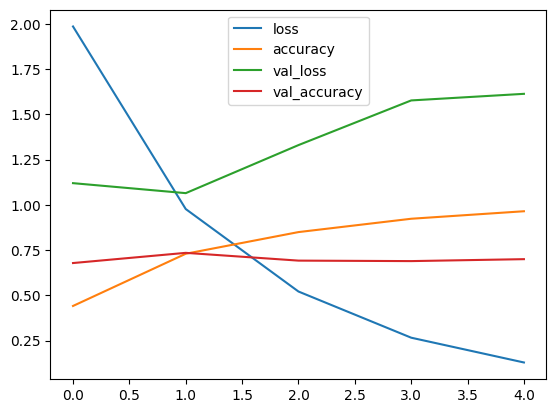

In [ ]:
pd.DataFrame(history.history).plot()

Clear Signs of Being Over Fitted

# Test 2 - Regex + lemmatization



In [ ]:
cdata = data.drop(['Resume_html','ID'],axis = 1)

In [ ]:
cdata

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [ ]:
def clean_data(dta):
  dta = dta.lower()
  dta = re.sub('\n',' <eol> ',dta)
  dta = re.sub('//','',dta)
  dta = re.sub('http\S+\s*', ' ', dta)
  dta = re.sub('RT|cc', ' ', dta)
  dta = re.sub('#\S+', '', dta)
  pattern = re.compile(r"[!\"#\$%&\'\(\)\*\+,-\./:;=\?@\[\\\]\^_`{\|}~－]")
  dta = re.sub(pattern,'',dta)
  dta = re.sub('\s+',' ',dta).strip()
  dta = re.split('\s',dta)
  dta = [w for w in dta if not w in stop_words and w != '']
  return dta

In [ ]:
for x in range(len(cdata)):
  cdata['Resume_str'][x] = clean_data(cdata['Resume_str'][x])

In [ ]:
cdata

,Resume_str,Category
0,"[hr, administratormarketing, associate, <eol>,...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, 20, years, experience,...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR
...,...,...
2479,"[rank, sgte5, non, commissioned, officer, char...",AVIATION
2480,"[government, relations, communications, organi...",AVIATION
2481,"[geek, squad, agent, professional, profile, su...",AVIATION
2482,"[program, director, office, manager, summary, ...",AVIATION


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
cdata['Resume_str'][0][0]

'hr'

In [ ]:
for x in range(len(cdata)):
  for y in range(len(cdata['Resume_str'][x])):
    cdata['Resume_str'][x][y]=wordnet_lemmatizer.lemmatize(cdata['Resume_str'][x][y])

In [ ]:
cdata

,Resume_str,Category
0,"[hr, administratormarketing, associate, <eol>,...",HR
1,"[hr, specialist, u, hr, operation, summary, ve...",HR
2,"[hr, director, summary, 20, year, experience, ...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlight, hr, skill, hr,...",HR
...,...,...
2479,"[rank, sgte5, non, commissioned, officer, char...",AVIATION
2480,"[government, relation, communication, organiza...",AVIATION
2481,"[geek, squad, agent, professional, profile, su...",AVIATION
2482,"[program, director, office, manager, summary, ...",AVIATION


### Create a Corpus

In [ ]:
corpus = set()

In [ ]:
for x in cdata['Resume_str']:
  for y in x:
    corpus.add(y)

In [ ]:
corpus

{'willis',
 'breakins',
 'lath',
 'relied',
 'dbc',
 'investor',
 'peru',
 'codinginsurance',
 'vicechair',
 'membersdiverse',
 '5236000',
 'bpu',
 'engineairframe',
 'macys',
 'aseptic',
 'fayaz',
 'julyaugustsept',
 'fuel',
 'rodriguez',
 'overwhelmed',
 'rentalmaintenance',
 'servicepublic',
 'conveying',
 'vera',
 'profiency',
 '409',
 'salespeoples',
 'rentable',
 'instructional',
 'modality',
 'brainstorm',
 'immunology',
 'poc',
 'absorbed',
 'highrisk',
 'childhood6',
 'affected',
 'volleball',
 'marketableclear',
 '20032007',
 'usd',
 'p2p',
 '5week',
 'creditworthy',
 'researcher',
 'wipro',
 'bledsoe',
 'prehospital',
 'operatingmanaging',
 'denial',
 'reposition',
 'oakland',
 'consolidator',
 'redx',
 'xwing32',
 'ides',
 'transmitter',
 'constructware',
 'farrellaposs',
 'post911',
 'createdmaintained',
 'youthserving',
 'sama',
 'can”',
 'addhoc',
 'tikosynviagra',
 '24kv',
 'finical',
 'wprd',
 'rosary',
 'lubrication',
 'promptly',
 'fee',
 'trainingadministrative',
 '

In [ ]:
len(corpus)

50432

That's a Big Number

In [ ]:
len(cdata)

2484

Map words to a number bcz neural network only understands number

In [ ]:
corpus = list(corpus)

In [ ]:
word_to_num = {word: i+1 for i, word in enumerate(corpus)}

In [ ]:
word_to_num

{'willis': 1,
 'breakins': 2,
 'lath': 3,
 'relied': 4,
 'dbc': 5,
 'investor': 6,
 'peru': 7,
 'codinginsurance': 8,
 'vicechair': 9,
 'membersdiverse': 10,
 '5236000': 11,
 'bpu': 12,
 'engineairframe': 13,
 'macys': 14,
 'aseptic': 15,
 'fayaz': 16,
 'julyaugustsept': 17,
 'fuel': 18,
 'rodriguez': 19,
 'overwhelmed': 20,
 'rentalmaintenance': 21,
 'servicepublic': 22,
 'conveying': 23,
 'vera': 24,
 'profiency': 25,
 '409': 26,
 'salespeoples': 27,
 'rentable': 28,
 'instructional': 29,
 'modality': 30,
 'brainstorm': 31,
 'immunology': 32,
 'poc': 33,
 'absorbed': 34,
 'highrisk': 35,
 'childhood6': 36,
 'affected': 37,
 'volleball': 38,
 'marketableclear': 39,
 '20032007': 40,
 'usd': 41,
 'p2p': 42,
 '5week': 43,
 'creditworthy': 44,
 'researcher': 45,
 'wipro': 46,
 'bledsoe': 47,
 'prehospital': 48,
 'operatingmanaging': 49,
 'denial': 50,
 'reposition': 51,
 'oakland': 52,
 'consolidator': 53,
 'redx': 54,
 'xwing32': 55,
 'ides': 56,
 'transmitter': 57,
 'constructware': 58,

In [ ]:
word_to_num['<PAD>'] = 0

### Convertion of Text Data into Numerical Values

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = [word_to_num[word] for word in cdata['Resume_str'][x]]

In [ ]:
cdata['Resume_str'][0]

[11474,
 2651,
 2607,
 2297,
 2297,
 11474,
 4068,
 43486,
 33031,
 20668,
 23238,
 19394,
 4546,
 38958,
 29326,
 43155,
 20668,
 23238,
 24192,
 42491,
 44933,
 6481,
 39600,
 10183,
 37601,
 26839,
 3241,
 3728,
 4260,
 20668,
 23238,
 11982,
 32915,
 20668,
 31967,
 10183,
 24192,
 23775,
 22533,
 26854,
 42929,
 7775,
 20365,
 1529,
 25686,
 16862,
 26420,
 26833,
 33465,
 35777,
 22124,
 47751,
 19140,
 20365,
 5796,
 36950,
 50114,
 20668,
 11839,
 23775,
 47140,
 23147,
 44351,
 41898,
 19394,
 20365,
 5796,
 23930,
 13512,
 15289,
 13195,
 43155,
 44033,
 23147,
 36135,
 16203,
 23435,
 2826,
 35968,
 23435,
 7717,
 44033,
 13714,
 10171,
 7508,
 6007,
 17442,
 20668,
 23238,
 4853,
 34833,
 41171,
 32078,
 2165,
 48029,
 42769,
 12071,
 24192,
 26056,
 41038,
 26497,
 29326,
 11474,
 2651,
 2607,
 2297,
 2297,
 11474,
 4068,
 18955,
 20368,
 6185,
 46890,
 17949,
 31426,
 743,
 4825,
 9509,
 5694,
 20510,
 31836,
 23244,
 25962,
 16551,
 28715,
 26833,
 21349,
 20365,
 47952,

In [ ]:
type(cdata['Resume_str'][0])

list

In [ ]:
for x in range(len(cdata)):
  cdata['Resume_str'] = np.array(cdata['Resume_str'])

In [ ]:
cdata

,Resume_str,Category
0,"[11474, 2651, 2607, 2297, 2297, 11474, 4068, 4...",HR
1,"[11474, 33465, 1721, 11474, 5449, 43486, 3873,...",HR
2,"[11474, 32052, 43486, 16615, 38958, 29326, 243...",HR
3,"[11474, 33465, 43486, 33031, 39914, 40805, 166...",HR
4,"[11474, 19394, 14762, 11982, 11474, 14762, 114...",HR
...,...,...
2479,"[19424, 20118, 7310, 23340, 32821, 25718, 2514...",AVIATION
2480,"[11036, 26833, 31798, 40374, 1529, 32052, 1281...",AVIATION
2481,"[40012, 25694, 49449, 12813, 46698, 48118, 334...",AVIATION
2482,"[27046, 32052, 21476, 19394, 43486, 16915, 271...",AVIATION


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Add Padding

In [ ]:
max_length = max_length = max(len(x) for x in cdata['Resume_str'])
max_length

4669

In [ ]:
import tensorflow as tf

In [ ]:
padded_sentences = pad_sequences(cdata['Resume_str'], maxlen=max_length, padding='post')

In [ ]:
padded_sentences.shape

(2484, 4669)

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = padded_sentences[x]

In [ ]:
cdata

,Resume_str,Category
0,"[11474, 2651, 2607, 2297, 2297, 11474, 4068, 4...",HR
1,"[11474, 33465, 1721, 11474, 5449, 43486, 3873,...",HR
2,"[11474, 32052, 43486, 16615, 38958, 29326, 243...",HR
3,"[11474, 33465, 43486, 33031, 39914, 40805, 166...",HR
4,"[11474, 19394, 14762, 11982, 11474, 14762, 114...",HR
...,...,...
2479,"[19424, 20118, 7310, 23340, 32821, 25718, 2514...",AVIATION
2480,"[11036, 26833, 31798, 40374, 1529, 32052, 1281...",AVIATION
2481,"[40012, 25694, 49449, 12813, 46698, 48118, 334...",AVIATION
2482,"[27046, 32052, 21476, 19394, 43486, 16915, 271...",AVIATION


In [ ]:
cdata.isna().sum()

Resume_str    0
Category      0
dtype: int64

changing the target to categorical data

In [ ]:
cdata

,Resume_str,Category
0,"[11474, 2651, 2607, 2297, 2297, 11474, 4068, 4...",HR
1,"[11474, 33465, 1721, 11474, 5449, 43486, 3873,...",HR
2,"[11474, 32052, 43486, 16615, 38958, 29326, 243...",HR
3,"[11474, 33465, 43486, 33031, 39914, 40805, 166...",HR
4,"[11474, 19394, 14762, 11982, 11474, 14762, 114...",HR
...,...,...
2479,"[19424, 20118, 7310, 23340, 32821, 25718, 2514...",AVIATION
2480,"[11036, 26833, 31798, 40374, 1529, 32052, 1281...",AVIATION
2481,"[40012, 25694, 49449, 12813, 46698, 48118, 334...",AVIATION
2482,"[27046, 32052, 21476, 19394, 43486, 16915, 271...",AVIATION


In [ ]:
cate = cdata.Category.unique()

In [ ]:
cate = {x:i for i,x in enumerate(cate)}

In [ ]:
cate

{'HR': 0,
 'DESIGNER': 1,
 'INFORMATION-TECHNOLOGY': 2,
 'TEACHER': 3,
 'ADVOCATE': 4,
 'BUSINESS-DEVELOPMENT': 5,
 'HEALTHCARE': 6,
 'FITNESS': 7,
 'AGRICULTURE': 8,
 'BPO': 9,
 'SALES': 10,
 'CONSULTANT': 11,
 'DIGITAL-MEDIA': 12,
 'AUTOMOBILE': 13,
 'CHEF': 14,
 'FINANCE': 15,
 'APPAREL': 16,
 'ENGINEERING': 17,
 'ACCOUNTANT': 18,
 'CONSTRUCTION': 19,
 'PUBLIC-RELATIONS': 20,
 'BANKING': 21,
 'ARTS': 22,
 'AVIATION': 23}

In [ ]:
for x in range(len(cdata)):
  cdata.Category[x] = int(cate[cdata.Category[x]])

In [ ]:
cdata

,Resume_str,Category
0,"[11474, 2651, 2607, 2297, 2297, 11474, 4068, 4...",0
1,"[11474, 33465, 1721, 11474, 5449, 43486, 3873,...",0
2,"[11474, 32052, 43486, 16615, 38958, 29326, 243...",0
3,"[11474, 33465, 43486, 33031, 39914, 40805, 166...",0
4,"[11474, 19394, 14762, 11982, 11474, 14762, 114...",0
...,...,...
2479,"[19424, 20118, 7310, 23340, 32821, 25718, 2514...",23
2480,"[11036, 26833, 31798, 40374, 1529, 32052, 1281...",23
2481,"[40012, 25694, 49449, 12813, 46698, 48118, 334...",23
2482,"[27046, 32052, 21476, 19394, 43486, 16915, 271...",23


In [ ]:
df = cdata.sample(random_state=430,frac = 1).reset_index(drop=True)

In [ ]:
df

,Resume_str,Category
0,"[36507, 20601, 19394, 43486, 20601, 12813, 461...",15
1,"[49202, 8261, 43486, 12914, 23373, 8261, 24600...",1
2,"[30452, 35777, 20428, 34572, 5796, 28948, 2351...",4
3,"[20601, 19394, 35777, 40387, 23191, 1121, 1744...",15
4,"[497, 7632, 5449, 19394, 44600, 32821, 43486, ...",21
...,...,...
2479,"[40038, 48082, 1859, 26833, 19394, 43486, 1941...",20
2480,"[50329, 43486, 28013, 14657, 22210, 46591, 166...",11
2481,"[20668, 23238, 25618, 25463, 25308, 36488, 193...",13
2482,"[18995, 7297, 36623, 43486, 31922, 33031, 2465...",22


In [ ]:
df.isna().sum()

Resume_str    0
Category      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Model 2

In [ ]:
x = df['Resume_str'].tolist()
x = np.stack(x)

In [ ]:
x

array([[36507, 20601, 19394, ...,     0,     0,     0],
       [49202,  8261, 43486, ...,     0,     0,     0],
       [30452, 35777, 20428, ...,     0,     0,     0],
       ...,
       [20668, 23238, 25618, ...,     0,     0,     0],
       [18995,  7297, 36623, ...,     0,     0,     0],
       [19581, 27109, 43486, ...,     0,     0,     0]], dtype=int32)

In [ ]:
x.dtype

dtype('int32')

In [ ]:
y = df['Category'].tolist()
y = np.stack(y)

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y = np.array(y,dtype = int)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
y.dtype

dtype('int64')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5)

In [ ]:
len(x_train),len(x_val),len(x_test)

(1738, 373, 373)

In [ ]:
x_train.dtype

dtype('int32')

In [ ]:
embedding_dim = 64
vocab_size = len(corpus)
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(24, activation='softmax')
])

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 64)             3227648   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 24)                1560      
                                                                 
Total params: 3303512 (12.60 MB)
Trainable params: 3303512 (12.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,epochs=5,steps_per_epoch=len(x_train),validation_data=(x_val,y_val),validation_steps=len(x_val))

Epoch 1/5
1738/1738 [==============================] - 488s 279ms/step - loss: 1.9934 - accuracy: 0.4419 - val_loss: 1.2910 - val_accuracy: 0.6220
Epoch 2/5
1738/1738 [==============================] - 434s 250ms/step - loss: 0.9558 - accuracy: 0.7348 - val_loss: 1.1450 - val_accuracy: 0.6944
Epoch 3/5
1738/1738 [==============================] - 404s 233ms/step - loss: 0.5416 - accuracy: 0.8493 - val_loss: 1.3887 - val_accuracy: 0.6810
Epoch 4/5
1738/1738 [==============================] - 423s 244ms/step - loss: 0.2821 - accuracy: 0.9235 - val_loss: 1.6465 - val_accuracy: 0.6461
Epoch 5/5
1738/1738 [==============================] - 404s 233ms/step - loss: 0.1649 - accuracy: 0.9499 - val_loss: 1.8865 - val_accuracy: 0.6649


<Axes: >

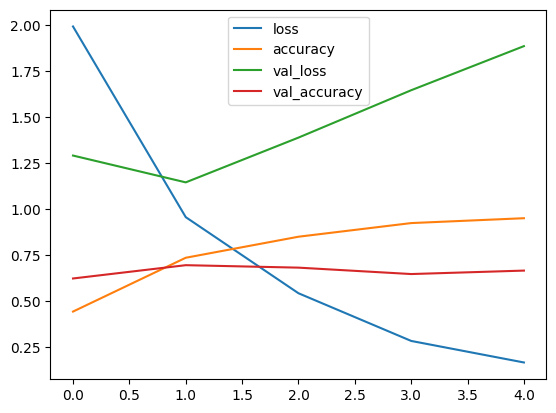

In [ ]:
pd.DataFrame(history.history).plot()

Better That Before Still Scope of Improvement

# Test 3 - Regex + lemmatization + NLTK Word Tokenizer



In [ ]:
cdata = data.drop(['Resume_html','ID'],axis = 1)

In [ ]:
cdata

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_data(dta):
  dta = dta.lower()
  dta = re.sub('\n',' <eol> ',dta)
  dta = re.sub('//','',dta)
  dta = re.sub('http\S+\s*', ' ', dta)
  dta = re.sub('RT|cc', ' ', dta)
  dta = re.sub('#\S+', '', dta)
  pattern = re.compile(r"[!\"#\$%&\'\(\)\*\+,-\./:;=\?@\[\\\]\^_`{\|}~－]")
  dta = re.sub(pattern,'',dta)
  dta = re.sub('\s+',' ',dta).strip()
  dta = nltk.tokenize.word_tokenize(dta)
  dta = [w for w in dta if not w in stop_words and w != '']
  return dta

In [ ]:
for x in range(len(cdata)):
  cdata['Resume_str'][x] = clean_data(cdata['Resume_str'][x])

In [ ]:
cdata

,Resume_str,Category
0,"[hr, administratormarketing, associate, <, eol...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, 20, years, experience,...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR
...,...,...
2479,"[rank, sgte5, non, commissioned, officer, char...",AVIATION
2480,"[government, relations, communications, organi...",AVIATION
2481,"[geek, squad, agent, professional, profile, su...",AVIATION
2482,"[program, director, office, manager, summary, ...",AVIATION


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
cdata['Resume_str'][0][0]

'hr'

In [ ]:
for x in range(len(cdata)):
  for y in range(len(cdata['Resume_str'][x])):
    cdata['Resume_str'][x][y]=ps.stem(cdata['Resume_str'][x][y])

In [ ]:
cdata

,Resume_str,Category
0,"[hr, administratormarket, associ, <, eol, >, <...",HR
1,"[hr, specialist, us, hr, oper, summari, versat...",HR
2,"[hr, director, summari, 20, year, experi, recr...",HR
3,"[hr, specialist, summari, dedic, driven, dynam...",HR
4,"[hr, manag, skill, highlight, hr, skill, hr, d...",HR
...,...,...
2479,"[rank, sgte5, non, commiss, offic, charg, brig...",AVIATION
2480,"[govern, relat, commun, organiz, develop, dire...",AVIATION
2481,"[geek, squad, agent, profession, profil, suppo...",AVIATION
2482,"[program, director, offic, manag, summari, hig...",AVIATION


### Create a Corpus

In [ ]:
corpus = set()

In [ ]:
for x in cdata['Resume_str']:
  for y in x:
    corpus.add(y)

In [ ]:
corpus

{'042000',
 'gaaprevis',
 'lawsuit',
 'projectcr',
 'bkp',
 'explicit',
 'grass',
 'laptopstransl',
 'bigip',
 '•review',
 'infield',
 'norshipco',
 'westernbagelcom',
 'vpna',
 '20022012',
 'av8b',
 'speakercar',
 'skeleton',
 'b',
 'subdivis',
 'beckwith',
 'mondal',
 'shoe',
 'critic',
 '14person',
 'riprap',
 '58d',
 'dwight',
 'kelamin',
 'wellington',
 'portfolio',
 'waitresscashierhostess',
 'norm',
 'fed',
 'prepayrol',
 '3qt09',
 'wakefield',
 'hilltop',
 'propertyinjuri',
 'smirnoff',
 'salesassist',
 'bronto',
 'troubleshootingmanag',
 'bureaureview',
 'coder',
 'transplantingharvest',
 '\xadannounc',
 'queri',
 'arkansa',
 'colon',
 'syrorun',
 'gregori',
 'jda',
 'restauranteur',
 'rtlab',
 '75100',
 'fashiongp',
 'nastran',
 'nafta',
 'diplomacomplet',
 'politician',
 'vang',
 'height',
 '19811985',
 'aqmd',
 'h60',
 'processesl',
 '2292955',
 'cfni',
 'scratcher',
 'customerbas',
 'glass',
 'rgpv',
 'spodoptera',
 'pmipmp',
 'carpedia',
 'edgar',
 'prototypeupgrademodifi

In [ ]:
len(corpus)

42879

That's a Big Number

In [ ]:
len(cdata)

2484

Map words to a number bcz neural network only understands number

In [ ]:
corpus = list(corpus)

In [ ]:
word_to_num = {word: i+1 for i, word in enumerate(corpus)}

In [ ]:
word_to_num

{'042000': 1,
 'gaaprevis': 2,
 'lawsuit': 3,
 'projectcr': 4,
 'bkp': 5,
 'explicit': 6,
 'grass': 7,
 'laptopstransl': 8,
 'bigip': 9,
 '•review': 10,
 'infield': 11,
 'norshipco': 12,
 'westernbagelcom': 13,
 'vpna': 14,
 '20022012': 15,
 'av8b': 16,
 'speakercar': 17,
 'skeleton': 18,
 'b': 19,
 'subdivis': 20,
 'beckwith': 21,
 'mondal': 22,
 'shoe': 23,
 'critic': 24,
 '14person': 25,
 'riprap': 26,
 '58d': 27,
 'dwight': 28,
 'kelamin': 29,
 'wellington': 30,
 'portfolio': 31,
 'waitresscashierhostess': 32,
 'norm': 33,
 'fed': 34,
 'prepayrol': 35,
 '3qt09': 36,
 'wakefield': 37,
 'hilltop': 38,
 'propertyinjuri': 39,
 'smirnoff': 40,
 'salesassist': 41,
 'bronto': 42,
 'troubleshootingmanag': 43,
 'bureaureview': 44,
 'coder': 45,
 'transplantingharvest': 46,
 '\xadannounc': 47,
 'queri': 48,
 'arkansa': 49,
 'colon': 50,
 'syrorun': 51,
 'gregori': 52,
 'jda': 53,
 'restauranteur': 54,
 'rtlab': 55,
 '75100': 56,
 'fashiongp': 57,
 'nastran': 58,
 'nafta': 59,
 'diplomacomple

In [ ]:
word_to_num['<PAD>'] = 0

### Convertion of Text Data into Numerical Values

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = [word_to_num[word] for word in cdata['Resume_str'][x]]

In [ ]:
cdata['Resume_str'][0]

[36024,
 17602,
 18470,
 27841,
 31912,
 19391,
 27841,
 31912,
 19391,
 36024,
 835,
 24306,
 39133,
 32432,
 179,
 26202,
 16922,
 40194,
 17558,
 8950,
 32432,
 179,
 26202,
 14536,
 6733,
 2085,
 28586,
 37848,
 39098,
 12734,
 23127,
 30755,
 6519,
 32432,
 179,
 13626,
 8948,
 32432,
 11937,
 37848,
 26202,
 36676,
 7969,
 6770,
 34209,
 11578,
 17511,
 7836,
 42827,
 33248,
 27274,
 14219,
 40357,
 37930,
 10959,
 41731,
 41832,
 17511,
 29645,
 10100,
 40554,
 32432,
 14919,
 36676,
 32403,
 3821,
 11484,
 40465,
 26202,
 17511,
 29645,
 37930,
 13546,
 37025,
 34611,
 8950,
 8764,
 3821,
 17469,
 34535,
 22095,
 6765,
 40976,
 22095,
 8417,
 8764,
 33737,
 16495,
 35189,
 29240,
 30393,
 32432,
 179,
 12823,
 40506,
 12052,
 26413,
 31416,
 13246,
 40440,
 5671,
 26202,
 16790,
 1185,
 21816,
 17558,
 36024,
 17602,
 18470,
 27841,
 31912,
 19391,
 27841,
 31912,
 19391,
 36024,
 835,
 37004,
 6245,
 17015,
 39586,
 1987,
 17080,
 7281,
 5889,
 7836,
 32203,
 34636,
 20385,
 1

In [ ]:
type(cdata['Resume_str'][0])

list

In [ ]:
for x in range(len(cdata)):
  cdata['Resume_str'] = np.array(cdata['Resume_str'])

In [ ]:
cdata

,Resume_str,Category
0,"[36024, 17602, 18470, 27841, 31912, 19391, 278...",HR
1,"[36024, 40357, 24916, 36024, 7011, 24306, 4123...",HR
2,"[36024, 38633, 24306, 18396, 40194, 17558, 782...",HR
3,"[36024, 40357, 24306, 39133, 14594, 15449, 183...",HR
4,"[36024, 26202, 42827, 13626, 36024, 42827, 360...",HR
...,...,...
2479,"[42830, 16603, 35600, 35093, 13822, 24296, 449...",AVIATION
2480,"[24999, 14219, 26972, 39270, 7836, 38633, 2188...",AVIATION
2481,"[17090, 2585, 10622, 21887, 12058, 3533, 40357...",AVIATION
2482,"[10433, 38633, 13822, 26202, 24306, 11843, 264...",AVIATION


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Add Padding

In [ ]:
max_length = max_length = max(len(x) for x in cdata['Resume_str'])
max_length

7003

In [ ]:
padded_sentences = pad_sequences(cdata['Resume_str'], maxlen=max_length, padding='post')

In [ ]:
padded_sentences.shape

(2484, 7003)

In [ ]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = padded_sentences[x]

In [ ]:
cdata

,Resume_str,Category
0,"[36024, 17602, 18470, 27841, 31912, 19391, 278...",HR
1,"[36024, 40357, 24916, 36024, 7011, 24306, 4123...",HR
2,"[36024, 38633, 24306, 18396, 40194, 17558, 782...",HR
3,"[36024, 40357, 24306, 39133, 14594, 15449, 183...",HR
4,"[36024, 26202, 42827, 13626, 36024, 42827, 360...",HR
...,...,...
2479,"[42830, 16603, 35600, 35093, 13822, 24296, 449...",AVIATION
2480,"[24999, 14219, 26972, 39270, 7836, 38633, 2188...",AVIATION
2481,"[17090, 2585, 10622, 21887, 12058, 3533, 40357...",AVIATION
2482,"[10433, 38633, 13822, 26202, 24306, 11843, 264...",AVIATION


In [ ]:
cdata.isna().sum()

Resume_str    0
Category      0
dtype: int64

changing the target to categorical data

In [ ]:
cdata

,Resume_str,Category
0,"[36024, 17602, 18470, 27841, 31912, 19391, 278...",HR
1,"[36024, 40357, 24916, 36024, 7011, 24306, 4123...",HR
2,"[36024, 38633, 24306, 18396, 40194, 17558, 782...",HR
3,"[36024, 40357, 24306, 39133, 14594, 15449, 183...",HR
4,"[36024, 26202, 42827, 13626, 36024, 42827, 360...",HR
...,...,...
2479,"[42830, 16603, 35600, 35093, 13822, 24296, 449...",AVIATION
2480,"[24999, 14219, 26972, 39270, 7836, 38633, 2188...",AVIATION
2481,"[17090, 2585, 10622, 21887, 12058, 3533, 40357...",AVIATION
2482,"[10433, 38633, 13822, 26202, 24306, 11843, 264...",AVIATION


In [ ]:
cate = cdata.Category.unique()

In [ ]:
cate = {x:i for i,x in enumerate(cate)}

In [ ]:
cate

{'HR': 0,
 'DESIGNER': 1,
 'INFORMATION-TECHNOLOGY': 2,
 'TEACHER': 3,
 'ADVOCATE': 4,
 'BUSINESS-DEVELOPMENT': 5,
 'HEALTHCARE': 6,
 'FITNESS': 7,
 'AGRICULTURE': 8,
 'BPO': 9,
 'SALES': 10,
 'CONSULTANT': 11,
 'DIGITAL-MEDIA': 12,
 'AUTOMOBILE': 13,
 'CHEF': 14,
 'FINANCE': 15,
 'APPAREL': 16,
 'ENGINEERING': 17,
 'ACCOUNTANT': 18,
 'CONSTRUCTION': 19,
 'PUBLIC-RELATIONS': 20,
 'BANKING': 21,
 'ARTS': 22,
 'AVIATION': 23}

In [ ]:
for x in range(len(cdata)):
  cdata.Category[x] = int(cate[cdata.Category[x]])

In [ ]:
cdata

,Resume_str,Category
0,"[36024, 17602, 18470, 27841, 31912, 19391, 278...",0
1,"[36024, 40357, 24916, 36024, 7011, 24306, 4123...",0
2,"[36024, 38633, 24306, 18396, 40194, 17558, 782...",0
3,"[36024, 40357, 24306, 39133, 14594, 15449, 183...",0
4,"[36024, 26202, 42827, 13626, 36024, 42827, 360...",0
...,...,...
2479,"[42830, 16603, 35600, 35093, 13822, 24296, 449...",23
2480,"[24999, 14219, 26972, 39270, 7836, 38633, 2188...",23
2481,"[17090, 2585, 10622, 21887, 12058, 3533, 40357...",23
2482,"[10433, 38633, 13822, 26202, 24306, 11843, 264...",23


In [ ]:
df = cdata.sample(random_state=430,frac = 1).reset_index(drop=True)

In [ ]:
df

,Resume_str,Category
0,"[4675, 33513, 26202, 24306, 33513, 21887, 6403...",15
1,"[42700, 27820, 24306, 13673, 30001, 27820, 280...",1
2,"[3424, 37930, 2470, 33379, 29645, 11284, 12813...",4
3,"[33513, 26202, 37930, 33643, 10467, 9264, 3039...",15
4,"[14053, 2173, 7011, 26202, 29107, 13822, 24306...",21
...,...,...
2479,"[835, 26756, 10827, 14219, 26202, 24306, 38868...",20
2480,"[33056, 24306, 23311, 38076, 39834, 352, 17819...",11
2481,"[32432, 179, 29516, 19845, 16911, 14163, 16429...",13
2482,"[21237, 35314, 28204, 24306, 22639, 39133, 378...",22


In [ ]:
df.isna().sum()

Resume_str    0
Category      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB




## Model 3

In [ ]:
x = df['Resume_str'].tolist()
x = np.stack(x)

In [ ]:
x

array([[ 4675, 33513, 26202, ...,     0,     0,     0],
       [42700, 27820, 24306, ...,     0,     0,     0],
       [ 3424, 37930,  2470, ...,     0,     0,     0],
       ...,
       [32432,   179, 29516, ...,     0,     0,     0],
       [21237, 35314, 28204, ...,     0,     0,     0],
       [36921, 26413, 24306, ...,     0,     0,     0]], dtype=int32)

In [ ]:
x.dtype

dtype('int32')

In [ ]:
y = df['Category'].tolist()
y = np.stack(y)

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2482,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y = np.array(y,dtype = int)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
y.dtype

dtype('int64')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5)

In [ ]:
len(x_train),len(x_val),len(x_test)

(1738, 373, 373)

In [ ]:
x_train.dtype

dtype('int32')

In [ ]:
embedding_dim = 64
vocab_size = len(corpus)
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),
  tf.keras.layers.Dense(24, activation='softmax')
])

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             2744256   
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 24)                1560      
                                                                 
Total params: 2820120 (10.76 MB)
Trainable params: 2820120 (10.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,epochs=5,steps_per_epoch=len(x_train),validation_data=(x_val,y_val),validation_steps=len(x_val))

Epoch 1/5
1738/1738 [==============================] - 657s 376ms/step - loss: 2.0370 - accuracy: 0.4350 - val_loss: 1.2561 - val_accuracy: 0.6595
Epoch 2/5
1738/1738 [==============================] - 554s 319ms/step - loss: 0.9553 - accuracy: 0.7371 - val_loss: 1.2175 - val_accuracy: 0.6783
Epoch 3/5
1738/1738 [==============================] - 585s 337ms/step - loss: 0.5692 - accuracy: 0.8458 - val_loss: 1.3282 - val_accuracy: 0.6917
Epoch 4/5
1738/1738 [==============================] - 594s 342ms/step - loss: 0.3411 - accuracy: 0.9022 - val_loss: 1.5885 - val_accuracy: 0.6917
Epoch 5/5
1738/1738 [==============================] - 583s 335ms/step - loss: 0.1960 - accuracy: 0.9488 - val_loss: 1.8639 - val_accuracy: 0.6676


<Axes: >

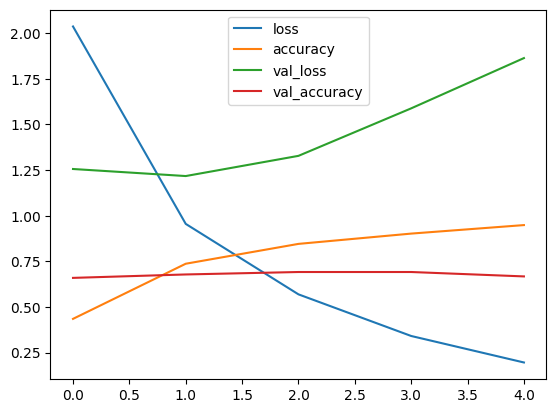

In [ ]:
pd.DataFrame(history.history).plot()

Better That Before Still Scope of Improvement

# Generative AI

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 36.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import google.generativeai as genai

In [ ]:
from IPython.display import display
from IPython.display import Markdown
import pathlib
import textwrap

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')

In [ ]:
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 174 ms, sys: 11.1 ms, total: 185 ms
Wall time: 10.5 s


In [ ]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': "The meaning of life is a profound philosophical question that has been pondered by humans for centuries. There is no universally accepted answer, as the meaning of life is subjective and personal. However, various philosophical, religious, and scientific perspectives offer insights into this complex question.\n\n**Existentialist Perspective:**\n\n* Existentialists believe that life has no inherent meaning and that individuals must create their own meaning through their choices and actions.\n* They emphasize the importance of authenticity, freedom, and responsibility.\n\n**Religious Perspectives:**\n\n* Many religions provide a framework for understanding the meaning of life through beliefs in a divine purpose or higher power.\n* Religious teachings often emphasize spiritual growth, ethical behavior, and serving others.\n\n**Humanis

In [ ]:
def clean_data(dta):
  dta = dta.lower()
  dta = re.sub('\n',' <eol> ',dta)
  dta = re.sub('//','',dta)
  pattern = re.compile(r"[!\"#\$%&\'\(\)\*\+,-\./:;=\?@\[\\\]\^_`{\|}~－]")
  dta = re.sub(pattern,'',dta)
  dta = re.sub('\s+',' ',dta).strip()
  dta = re.split('\s',dta)
  dta = [w for w in dta if not w in stop_words and w != '']
  return dta

In [ ]:
dta = data['Resume_str'][0]

In [ ]:
dta = clean_data(dta)

In [ ]:
def listToString(s):

    # initialize an empty string
    str1 = " "

    # return string
    return (str1.join(s))


# Driver code
print(listToString(dta))

hr administratormarketing associate <eol> <eol> hr administrator summary dedicated customer service manager 15 years experience hospitality customer service management respected builder leader customerfocused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multitasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administratormarketing associate <eol> <eol> hr administrator dec 2013 current company 

In [ ]:
mta = listToString(dta)

In [ ]:
response = model.generate_content(f"{mta}   \n --> in this i want you to give recommendation over this cv listing weaknesses, strengths, readability,etc this is an HRs Resume \n Also here <eol> means end of line")

In [ ]:
to_markdown(response.text)

> **Strengths:**
> 
> * **Extensive experience in HR and marketing:** 15 years in hospitality customer service management and HR administration, indicating a strong foundation in both areas.
> * **Customer-focused:** Repeated emphasis on customer satisfaction, team management, and conflict resolution techniques.
> * **Marketing savvy:** Experience in designing and creating marketing collateral, managing advertising programs, and analyzing marketing strategies.
> * **Multitasking abilities:** Demonstrated proficiency in handling multiple responsibilities including employee relations, marketing activities, and administrative tasks.
> 
> **Weaknesses:**
> 
> * **Lack of recent experience in HR administration:** The candidate's most recent HR experience was in December 2013, indicating a potential gap in up-to-date knowledge and skills.
> * **Formatting and readability:** The resume is cluttered with text, making it difficult to read. Consider using white space, headings, and bullet points to enhance readability.
> * **Organization:** The resume lacks a clear structure and logical flow of information. The different experiences are not organized in a specific order or by relevance to the position being sought.
> 
> **Recommendations to Improve:**
> 
> * **Highlight recent HR experience:** If the candidate has any relevant HR experience within the past five years, make sure it is prominently featured at the top of the resume.
> * **Enhance readability:** Rewrite the resume to make it more visually appealing and easier to skim. Use clear fonts, headings, and bullet points to organize the information.
> * **Tailor to specific roles:** When applying for HR or marketing positions, tailor the resume to the specific requirements of the job description. Highlight relevant skills and experience that align with the target role.
> * **Quantify accomplishments:** Provide specific metrics or examples to demonstrate the impact of your work in HR and marketing. For instance, quantify customer satisfaction improvements or marketing campaign successes.
> * **Proofread carefully:** Review the resume thoroughly for any errors in grammar, spelling, or formatting.